In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.ndimage as ndi

In [21]:
roll_no = 2021101121
lattice_size = ((roll_no%5)+1)*100
p_values = [0.3,0.4,0.7,0.5927]

# Question 1

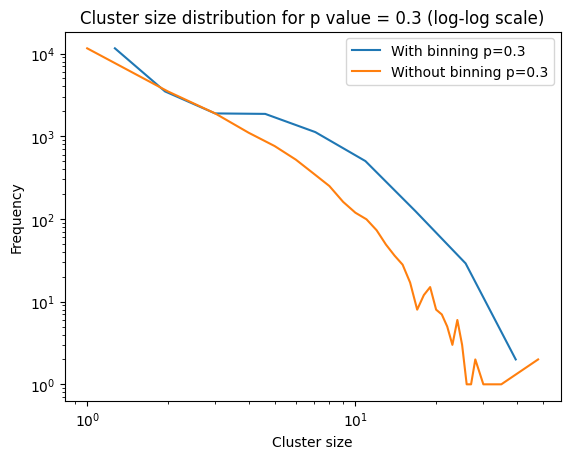

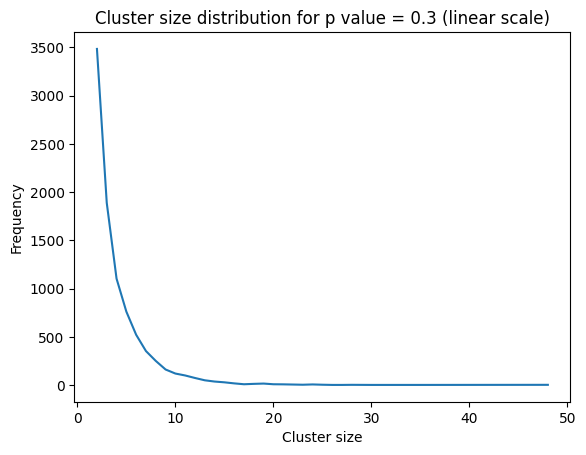

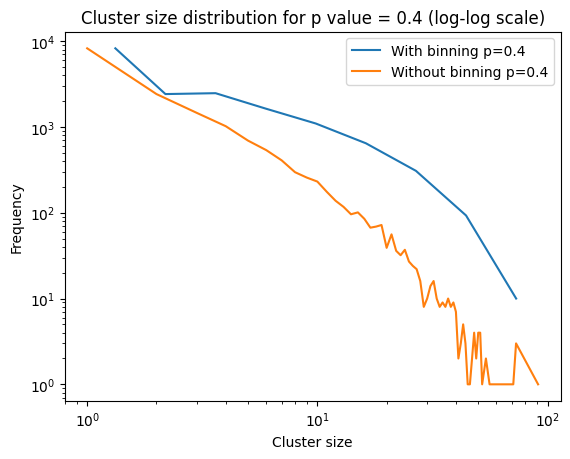

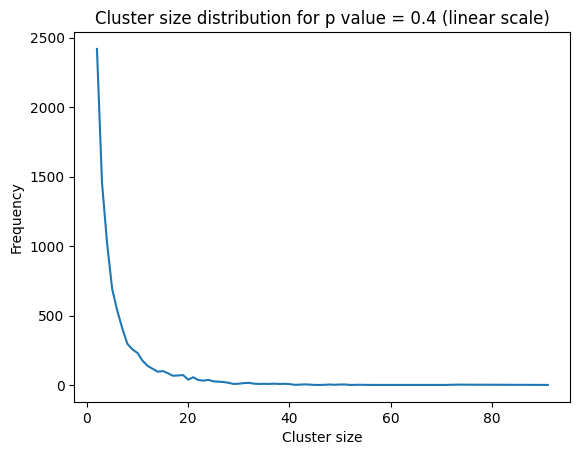

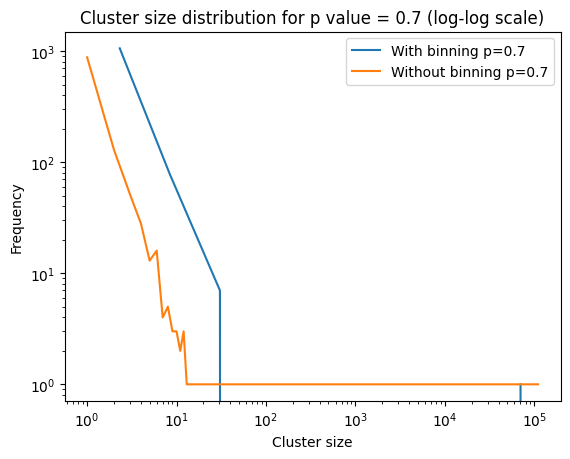

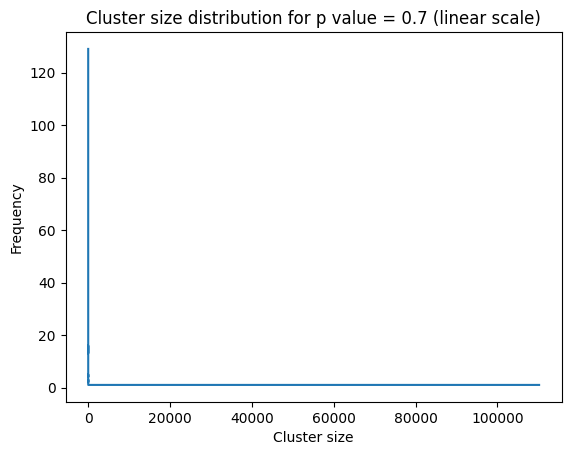

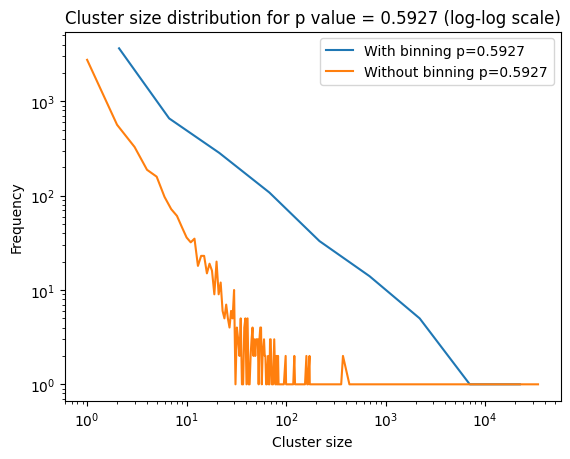

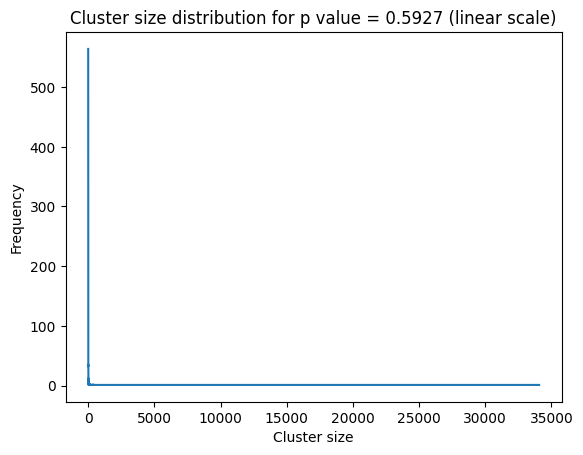

For p = p_critical, exponent is:  -0.7166490695216347


In [26]:
np.random.seed(42)
def calculate_clustersize(lattice):
    labels, _ = ndi.label(lattice)
    list_labels = labels.ravel()
    cluster_sizes = np.bincount(list_labels)
    return cluster_sizes

for p in p_values:
    lattice = np.random.choice([0, 1], size=(lattice_size, lattice_size), p=[1-p, p])
    cluster_sizes = calculate_clustersize(lattice)
    logbins = np.logspace(0,np.log10(cluster_sizes[1:].max()),num=10)
    widths = (logbins[1:] - logbins[:-1])
    cnts, edges = np.histogram(cluster_sizes[1:], bins=logbins)
    centres = (edges[:-1] + edges[1:])/2
    # print(cluster_sizes)
    unique_cluster_sizes, counts = np.unique(cluster_sizes[1:], return_counts=True)
    plt.loglog(centres, cnts, '-', label=f'With binning p={p}')
    plt.loglog(unique_cluster_sizes, counts, '-', label=f'Without binning p={p}')
    plt.title(f'Cluster size distribution for p value = {p} (log-log scale)')
    plt.xlabel('Cluster size')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
    
    plt.plot(unique_cluster_sizes[1:], counts[1:], '-', label=f'p={p}')
    plt.title(f'Cluster size distribution for p value = {p} (linear scale)')
    plt.xlabel('Cluster size')
    plt.ylabel('Frequency')
    plt.show()
    
    if(p == 0.5927):
        x = np.log10(unique_cluster_sizes)
        y = np.log10(counts)
        slope = np.polyfit(x, y, 1)[0]
        print('For p = p_critical, exponent is: ', slope)



# Question 2

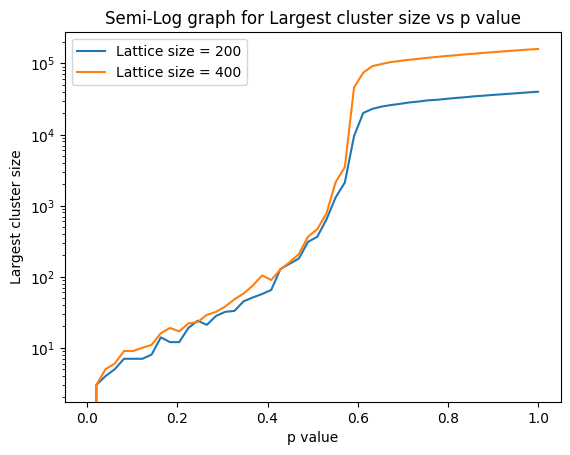

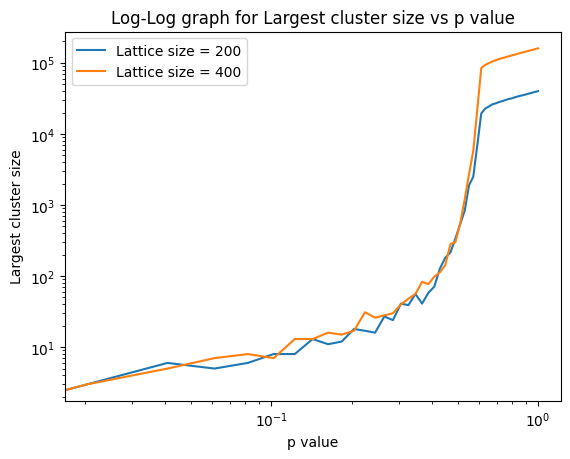

In [23]:
lattice_sizes = [lattice_size, 2*lattice_size]

def find_largest_clusters(lattice_size, p):
    lattice = np.random.rand(lattice_size,lattice_size)
    # lattice = np.random.choice([0, 1], size=(lattice_size, lattice_size), p=[1-p, p])
    lattice = (lattice<p).astype(int)
    cluster_sizes = calculate_clustersize(lattice)
    cluster_sizes = cluster_sizes[1:]
    if(len(cluster_sizes) > 0):
        largest_cluster = np.max(cluster_sizes)
        return largest_cluster
    return 0

for lattice_size in lattice_sizes:
    pvals = np.linspace(0,1,50)
    largest_clusters = []
    for p in pvals:
        largest_clusters.append(find_largest_clusters(lattice_size, p))
    # print(largest_clusters)
    plt.semilogy(pvals, largest_clusters, label=f'Lattice size = {lattice_size}')

plt.title('Semi-Log graph for Largest cluster size vs p value')
plt.legend()
plt.xlabel('p value')
plt.ylabel('Largest cluster size')
plt.show()

for lattice_size in lattice_sizes:
    pvals = np.linspace(0,1,50)
    largest_clusters = []
    for p in pvals:
        largest_clusters.append(find_largest_clusters(lattice_size, p))
    plt.loglog(pvals, largest_clusters, label=f'Lattice size = {lattice_size}')

plt.title('Log-Log graph for Largest cluster size vs p value')
plt.legend()
plt.xlabel('p value')
plt.ylabel('Largest cluster size')
plt.show()
        

# Question 3 
**Data From Wikipedia**

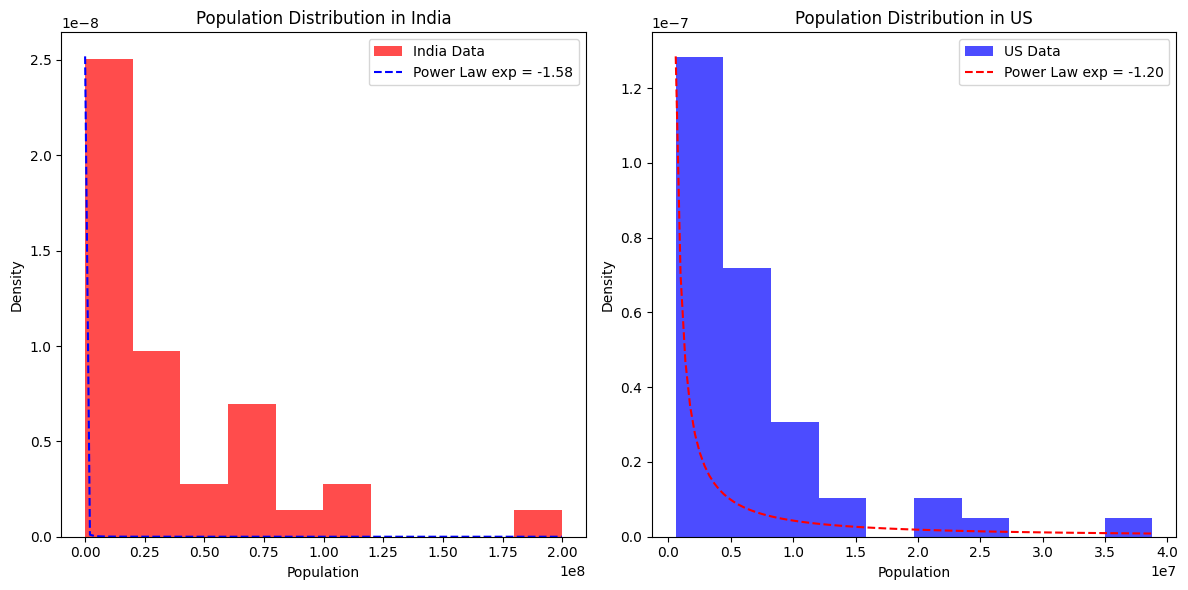

In [24]:
india_data = pd.read_csv('india.csv')
india_data = np.array(india_data)
# print(india_data)
us_data = pd.read_csv('us.csv')
us_data = np.array(us_data)
# print(us_data)

plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.hist(india_data, bins=10, alpha=0.7, density=True, color='r', label='India Data')
plt.title('Population Distribution in India')
plt.xlabel('Population')
plt.ylabel('Density')

exponent_india = -1.58
x_india = np.linspace(min(india_data), max(india_data), 100)
y_india = x_india**exponent_india
plt.plot(x_india, y_india, color='b', linestyle='--', label='Power Law exp = {:.2f}'.format(exponent_india))
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(us_data, bins=10, alpha=0.7, density=True, color='b', label='US Data')
plt.title('Population Distribution in US')
plt.xlabel('Population')
plt.ylabel('Density')

exponent_us = -1.195
x_us = np.linspace(min(us_data), max(us_data), 100)
y_us = x_us**exponent_us
plt.plot(x_us, y_us, color='r', linestyle='--', label='Power Law exp = {:.2f}'.format(exponent_us))
plt.legend()

plt.tight_layout()
plt.show()

# data = data['count'].to_numpy()
# print(data)


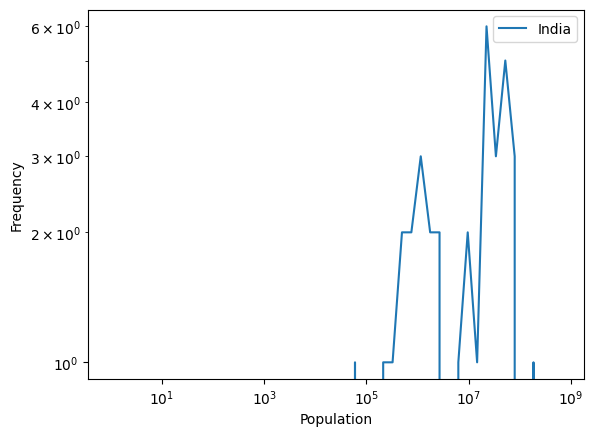

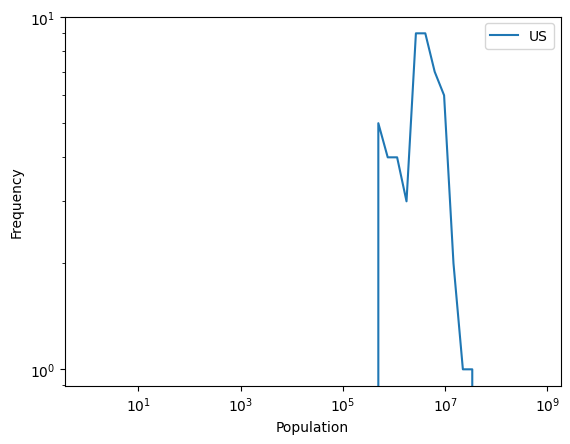

In [25]:
def get_bins(population):
    bins = np.logspace(0, 9, 50)
    hist, _ = np.histogram(population, bins=bins)
    return bins, hist

bins, hist = get_bins(india_data)

plt.figure()
plt.loglog(bins[:-1], hist, label='India')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.legend()
plt.show()

bins, hist = get_bins(us_data)

plt.figure()
plt.loglog(bins[:-1], hist, label='US')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.legend()
plt.show()



The log-log scale plots of both countries' population distributions do not exhibit straight lines with decreasing slopes, indicating that neither country follows a power law distribution.